In [1]:
!pip install --upgrade joblib==1.1.0
!pip install mglearn

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [12]:
!apt -qq -y install fonts-nanum > /dev/null

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_theme(style="darkgrid")

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name() 
fm._rebuild()  


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family=font_name)  
plt.rcParams['axes.unicode_minus'] = False 

'apt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\usr\\share\\fonts\\truetype\\nanum\\NanumBarunGothic.ttf'

In [2]:
import mglearn

from sklearn.model_selection import train_test_split

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


# bagging

### Random Forest

### 주요 파라미터

In [8]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [9]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) 
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, stratify=y, random_state=42
)

In [10]:
forest = RandomForestClassifier(n_estimators = 5, random_state=2).fit(X_tr, y_tr)

NameError: name 'ravel' is not defined

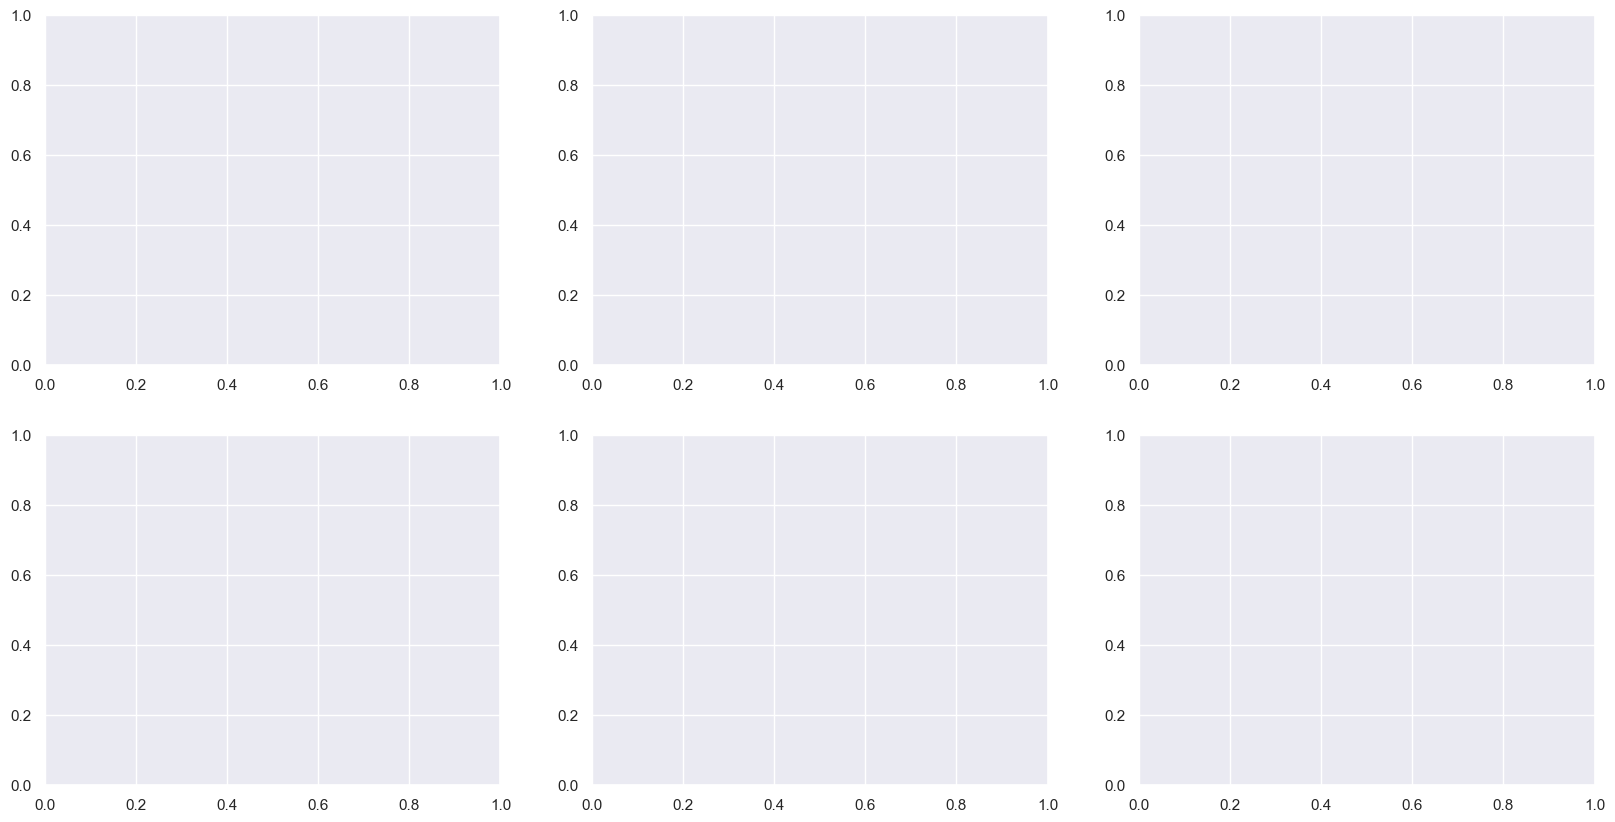

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes,ravel(), forest.estimators_)):
    ax.set_title(f"tree {i}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("forest")
mglearn.discrete_scatter(X[:, 0], X[:,1], y)

# Boosting

### Gradient Boost

### 주요 파라미터

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [20]:
gradient = GradientBoostingRegressor(random_state=0).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(X_tr, y_tr)} / 테스트용 평가지표: {gradient.score(X_te, y_te)}')

훈련용 평가지표: 0.9954470985502689 / 테스트용 평가지표: 0.8456938110259314


In [ ]:
gradient = GradientBoosting

# XGBoost

In [22]:
from xgboost import XGBClassifier,plot_importance

hp = {
    "random_state" : 42
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.965034965034965


In [23]:
hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 200, # 수행할 부스팅 단계 수
    "learning_rate": 0.01,
    "min_child_weight": 2,
    "gamma": 1
}

xgb = XGBClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {xgb.score(X_tr, y_tr)} / 테스트용 평가지표: {xgb.score(X_te, y_te)}')

훈련용 평가지표: 0.9812206572769953 / 테스트용 평가지표: 0.951048951048951


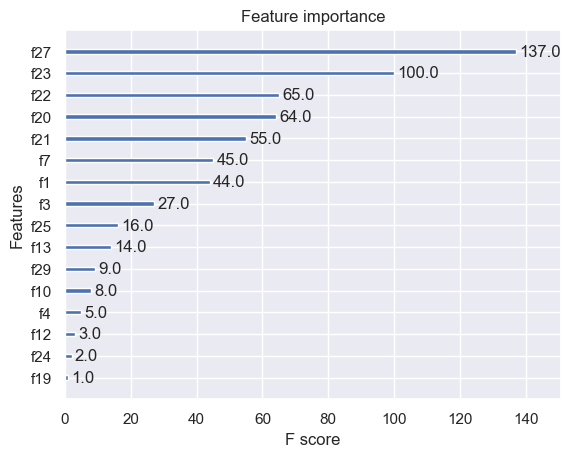

In [25]:
import matplotlib.pyplot as plt
plot_importance(xgb)
plt.show()

In [41]:
from xgboost import to_graphviz
to_graphviz(xgb)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# LightGBM

In [27]:
from lightgbm import LGBMClassifier, plot_importance

In [28]:
hp = {
    "random_state" : 42
}
lgb = LGBMClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lgb.score(X_tr, y_tr)} / 테스트용 평가지표: {lgb.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표: 0.965034965034965


In [29]:
hp = {            # 안 떨어질 시 주제를 더 하면 된다!
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 100,
    "learning_rate" : 0.01
}

lgb = LGBMClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {lgb.score(X_tr, y_tr)} / 테스트용 평가지표: {lgb.score(X_te, y_te)}')

훈련용 평가지표: 0.971830985915493 / 테스트용 평가지표: 0.951048951048951


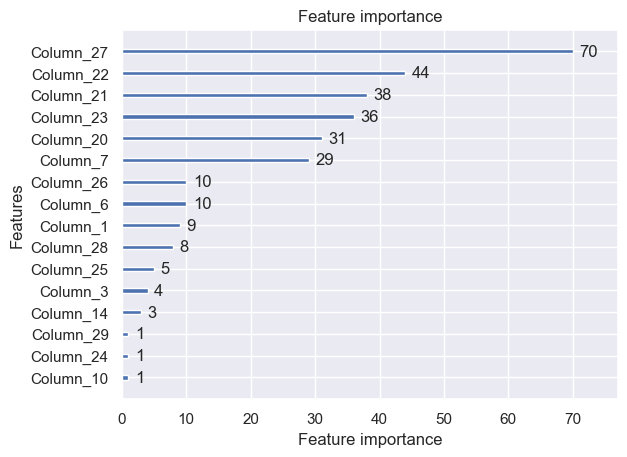

In [33]:
plot_importance(lgb)
plt.show()

In [42]:
from lightgbm import create_tree_digraph
create_tree_digraph(lgb)

ImportError: You must install graphviz and restart your session to plot tree.

# CatBoost

In [34]:
!pip install catboost

In [35]:
from catboost import CatBoostClassifier

In [37]:
hp = {
    "random_state" : 42,
    "verbose" : 0
}

cat = CatBoostClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {cat.score(X_tr, y_tr)} / 테스트용 평가지표 {cat.score(X_te, y_te)}')

훈련용 평가지표: 1.0 / 테스트용 평가지표 0.965034965034965


In [38]:
hp = {
    "random_state" : 42,
    "max_depth" : 2,
    "n_estimators" : 100,
    "verbose" : 0
}

cat = CatBoostClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {cat.score(X_tr, y_tr)} / 테스트용 결과지표: {cat.score(X_te, y_te)}')

훈련용 평가지표: 0.9882629107981221 / 테스트용 결과지표: 0.965034965034965


# Voting

In [40]:
from sklearn.ensemble import VotingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [48]:
SEED = 42
estimators = [
    ("mlp", MLPClassifier(max_iter=1000, random_state=SEED)),
    ("lr", LogisticRegression(random_state=SEED)),
    ("rf", RandomForestClassifier(random_state=SEED))
]

In [49]:
hp = {
    "estimators" : estimators,
    "voting" : "soft"
}   

vot = VotingClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {vot.score(X_tr, y_tr)} / 테스트용 평가지표: {vot.score(X_te, y_te)}')

C:\Users\Playdata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련용 평가지표: 0.971830985915493 / 테스트용 평가지표: 0.958041958041958


In [50]:
hp = {
    "estimators" : estimators,
    "voting" : "hard"
}   

vot = VotingClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {vot.score(X_tr, y_tr)} / 테스트용 평가지표: {vot.score(X_te, y_te)}')

C:\Users\Playdata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련용 평가지표: 0.9671361502347418 / 테스트용 평가지표: 0.9440559440559441


# Stacking

개별적인 모델들이 학습하고 예측한 데이터를 쌓아서 또 다른 학습데이터를 만들고 이 데이터를 기반으로 메타 모델을 하나 더 만들어 예측하는 모델이다.

In [52]:
from sklearn.ensemble import StackingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [54]:
SEED = 42
estimators = [
    ("mlp", MLPClassifier(max_iter=1000, random_state=SEED)),
    ("lr", LogisticRegression(random_state=SEED)),
    ("rf", RandomForestClassifier(random_state=SEED))
]

hp = {
    "estimators" : estimators,
    "final_estimators" : LogisticRegression(random_state=SEED)
}

stack = StackingClassifier(**hp, n_jobs=-1).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {stack.score(X_tr, y_tr)} / 테스트용 평가지표: {stack.score(X_te, y_te)}')

TypeError: StackingClassifier.__init__() got an unexpected keyword argument 'final_estimators'